# Grid Search

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv("Social_Network_Ads.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Training the Kernel SVM model on the Training set

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel="rbf", random_state=0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

## Applying k-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score

accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f} %".format(accuracies.mean() * 100))
print("Standard Deviation: {:.2f} %".format(accuracies.std() * 100))

Accuracy: 90.33 %
Standard Deviation: 6.57 %


## Applying Grid Search to find the best model and the best parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# we create a list of params we want to try and as we want to try 2 different kernel types we create 2 dictionaries
parameters = [
    {"C": [0.25, 0.5, 0.75, 1], "kernel": ["lenear"]},
    {
        "C": [0.25, 0.5, 0.75, 1],
        "kernel": ["rbf"],
        "gamma": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9],
    },
]
grid_search = GridSearchCV(
    estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10, n_jobs=-1
)

# only try on train set
grid_search.fit(X=X_train, y=y_train)
best_accuracy = grid_search.best_score_
best_params = grid_search.best_params_

print("Best Accuracy: {:.2f} %".format(best_accuracy * 100))
print("Best Parameters:", best_params)

Best Accuracy: 90.67 %
Best Parameters: {'C': 0.5, 'gamma': 0.6, 'kernel': 'rbf'}


/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/envs/tf_keras_py311/lib/python3.11/site-packages/sklearn/base.py", line 436, in _validate_params
   

## Applying best params and re-compute Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

classifier = SVC(kernel="rbf", C=0.5, gamma=0.6, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[64  4]
 [ 3 29]]


0.93

## Visualising the Training set results

/var/folders/q0/mh6ld9jx2ll_7nnmvb2d4wmc0000gn/T/ipykernel_10387/139927865.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(


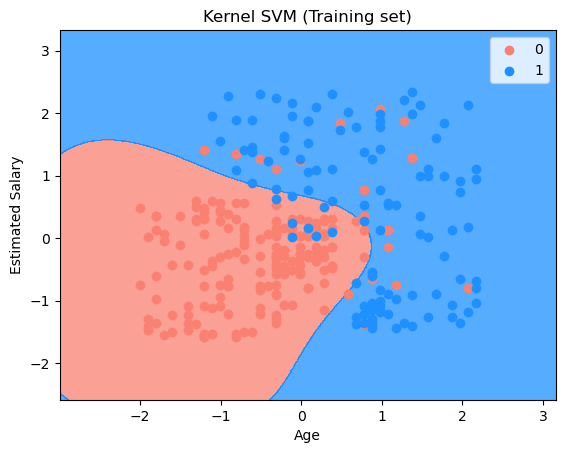

In [13]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("salmon", "dodgerblue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("salmon", "dodgerblue"))(i),
        label=j,
    )
plt.title("Kernel SVM (Training set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

## Visualising the Test set results

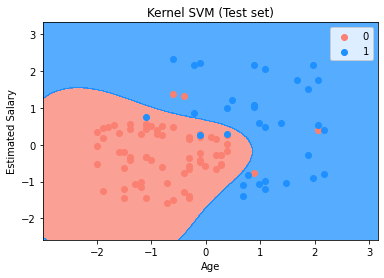

In [ ]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
    np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01),
)
plt.contourf(
    X1,
    X2,
    classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha=0.75,
    cmap=ListedColormap(("salmon", "dodgerblue")),
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c=ListedColormap(("salmon", "dodgerblue"))(i),
        label=j,
    )
plt.title("Kernel SVM (Test set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()